In [9]:
from libs.search import *
import matplotlib.pyplot as plt
from PIL import Image
import random

# import mlrose
import numpy as np




In [10]:

def plot_NQueens(solution, fig = None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    # im = im.resize((int(100 / n), int(100 / n)))
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    # NQueensCSP gives a solution as a dictionary
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    # NQueensProblem gives a solution as a list
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            l = 7/n
            newax = fig.add_axes([0.064 + (k * 0.896/n),((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()
    # return fig
    

C:\Users\HP\AppData\Local\Temp\ipykernel_9544\2076050087.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


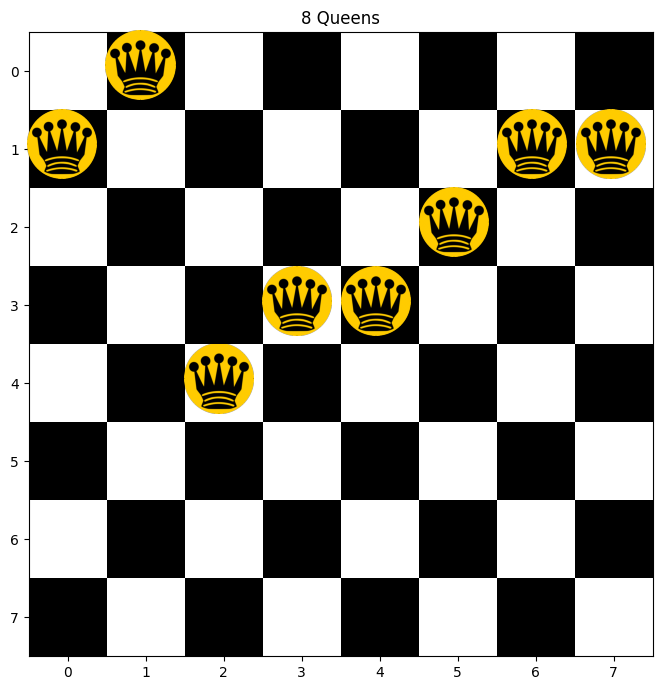

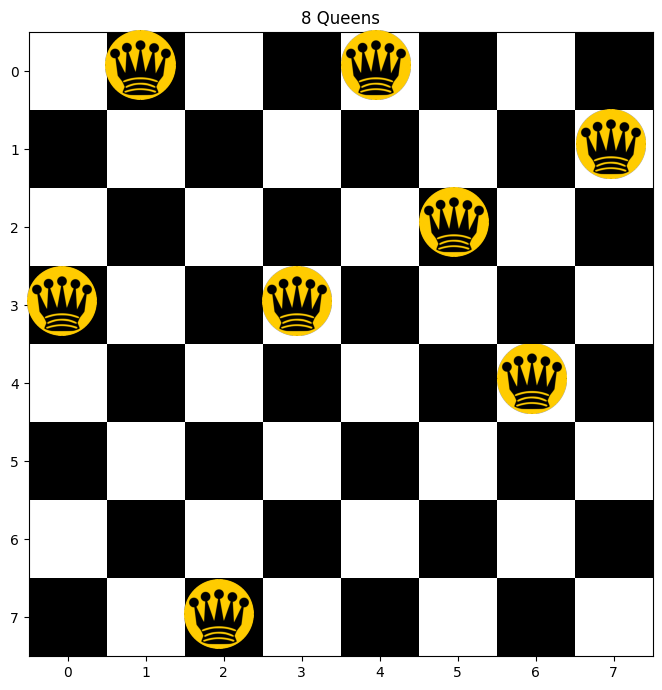

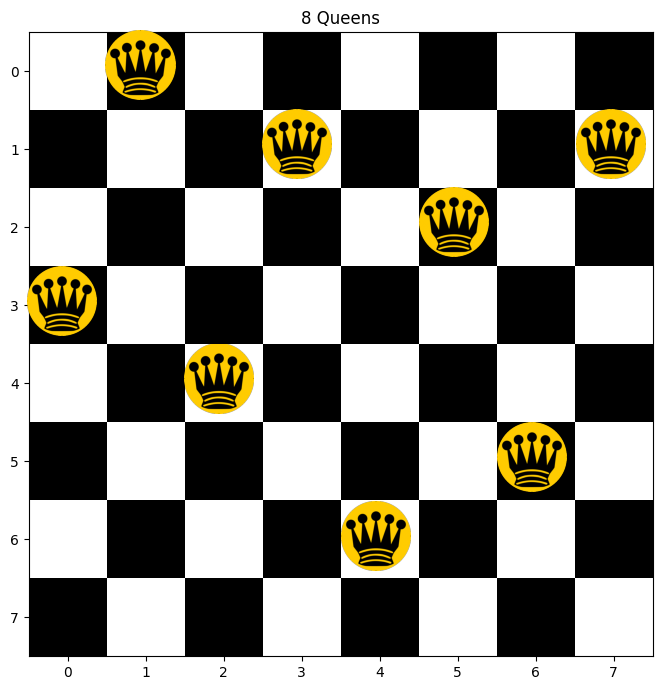

Intial state -  [1, 0, 4, 3, 3, 2, 1, 1]
Hill Climbing Solution -  [3, 0, 7, 3, 0, 2, 4, 1]
Stochastic Hill Climbing -  [3, 0, 4, 1, 6, 2, 5, 1]


In [11]:

def objective_function(board):
    """Compute the total number of queens attacking each other."""
    attacks = 0
    n = len(board)
    for i in range(n):
        for j in range(i + 1, n):
            if board[i] == board[j] or abs(board[i] - board[j]) == abs(i - j):
                attacks += 1
    return attacks

def successor(board):
    """Generate a new board configuration by randomly moving any queen to another place in its column."""
    new_board = list(board)
    queen = random.randint(0, len(new_board) - 1)
    new_board[queen] = random.randint(0, len(new_board) - 1)
    return new_board

def hill_climbing(board):
    """Hill climbing algorithm."""
    current_board = list(board)
    current_value = objective_function(current_board)
    
    while True:
        neighbors = [successor(current_board) for _ in range(len(current_board))]
        next_board = min(neighbors, key=objective_function)
        next_value = objective_function(next_board)
        
        if next_value >= current_value:
            return current_board
        
        current_board = next_board
        current_value = next_value

import random

def stochastic_hill_climbing(initial_state, objective_function, successor, max_iterations=1000):
    current_board = initial_state
    current_value = objective_function(current_board)
    iterations = 0
    
    while iterations < max_iterations:
        neighbors = [successor(current_board) for _ in range(len(current_board))]
        valid_neighbors = [neighbor for neighbor in neighbors if objective_function(neighbor) < current_value]
        
        if not valid_neighbors:
            break
        
        next_board = random.choice(valid_neighbors)
        next_value = objective_function(next_board)
        
        if next_value >= current_value:
            break
        
        current_board = next_board
        current_value = next_value
        iterations += 1
    
    return current_board

# Example usage



seed_value = 42
random.seed(seed_value)
initial_state = [random.randint(0, 7) for _ in range(8)]

nqp = NQueensProblem(len(initial_state)) #give number of queens as an argument.
plot_NQueens(initial_state) # to print the state everytime something changes. You can give an array of position of each queen.
hill_climbing_solution = hill_climbing(initial_state)
plot_NQueens(hill_climbing_solution)
stochastic_hill_climbing_solution = stochastic_hill_climbing(initial_state, objective_function, successor)
plot_NQueens(stochastic_hill_climbing_solution)



# Run hill climbing algorithm
print('Intial state - ',initial_state)
print('Hill Climbing Solution - ', hill_climbing_solution)
print('Stochastic Hill Climbing - ',stochastic_hill_climbing_solution)

# nqp = NQueensProblem(hill_climbing_solution) 






C:\Users\HP\AppData\Local\Temp\ipykernel_9544\1936077861.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


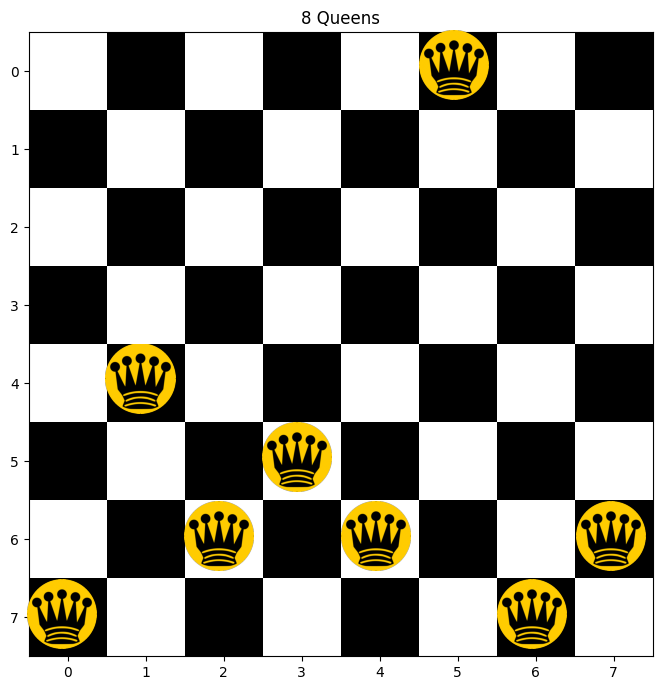

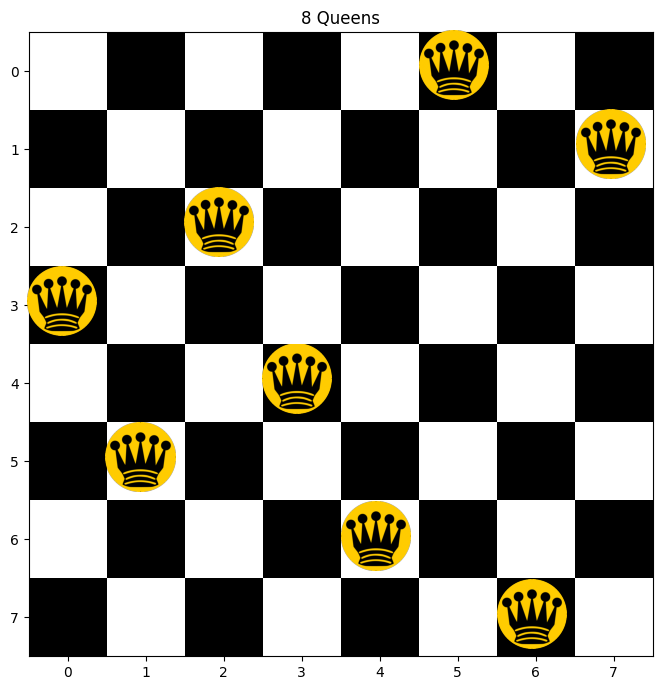

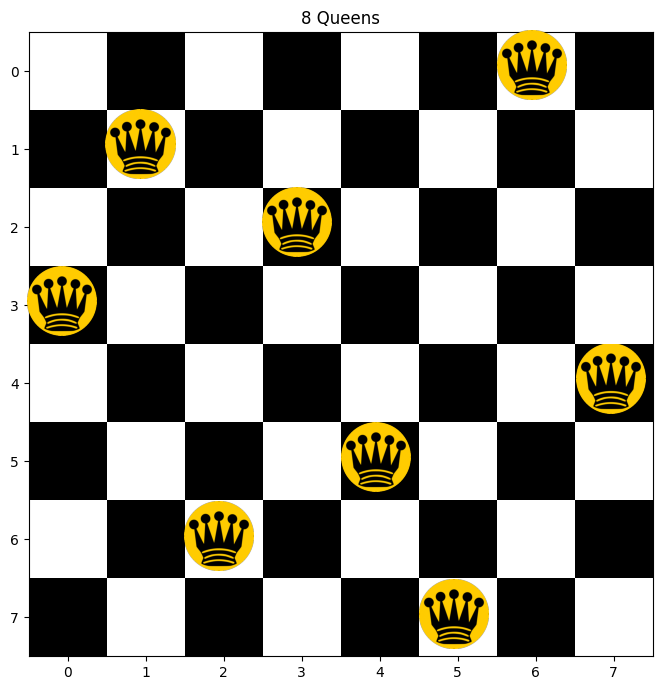

Intial state -  [7, 4, 6, 5, 6, 0, 7, 6]
Hill Climbing Solution -  [3, 5, 2, 4, 6, 0, 7, 1]
Stochastic Hill Climbing Solution -  [3, 1, 6, 2, 5, 7, 0, 4]


In [56]:
from libs.search import *
import matplotlib.pyplot as plt
from PIL import Image
import random
import time

def plot_NQueens(solution, fig=None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            newax = fig.add_axes([0.064 + (k * 0.896/n), ((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()

def objective_function(board):
    """Compute the total number of queens attacking each other."""
    attacks = 0
    n = len(board)
    for i in range(n):
        for j in range(i + 1, n):
            if board[i] == board[j] or abs(board[i] - board[j]) == abs(i - j):
                attacks += 1
    return attacks


  


def successor(board):
    """Generate a new board configuration by randomly moving queens to valid positions within their columns."""
    new_board = list(board)
    for i in range(len(new_board)):
        attempts = 0
        while attempts < 10:  # Limit the number of attempts to avoid infinite loops
            new_position = random.randint(0, len(new_board) - 1)
            if new_position != new_board[i] and not isattacking(new_board, i, new_position):  # Ensure new position is not occupied and not attacking other queens
                new_board[i] = new_position
                break
            attempts += 1
    return new_board


def isattacking(board, row, col):
    for i in range(row):
        if board[i] == col or abs(board[i] - col) == abs(i - row):
            return True
    return False





def hill_climbing(board):
    """Hill climbing algorithm."""
    current_board = list(board)
    current_value = objective_function(current_board)
    
    while True:
        neighbors = [successor(current_board) for _ in range(len(current_board))]
        next_board = min(neighbors, key=objective_function)
        next_value = objective_function(next_board)
        
        if next_value >= current_value:
            return current_board
        
        current_board = next_board
        current_value = next_value

def stochastic_hill_climbing(initial_state, objective_function, successor, max_iterations=1000):
    current_board = initial_state
    current_value = objective_function(current_board)
    iterations = 0
    
    while iterations < max_iterations:
        neighbors = [successor(current_board) for _ in range(len(current_board))]
        valid_neighbors = [neighbor for neighbor in neighbors if objective_function(neighbor) < current_value]
        
        if not valid_neighbors:
            break
        
        next_board = random.choice(valid_neighbors)
        next_value = objective_function(next_board)
        
        if next_value >= current_value:
            break
        
        current_board = next_board
        current_value = next_value
        iterations += 1
    
    return current_board

seed_value = 510
random.seed(seed_value)
initial_state = [random.randint(0, 7) for _ in range(8)]

plot_NQueens(initial_state)
hill_climbing_solution = hill_climbing(initial_state)
plot_NQueens(hill_climbing_solution)
stochastic_hill_climbing_solution = stochastic_hill_climbing(initial_state, objective_function, successor)
plot_NQueens(stochastic_hill_climbing_solution)

print('Intial state - ', initial_state)
print('Hill Climbing Solution - ', hill_climbing_solution)
print('Stochastic Hill Climbing Solution - ', stochastic_hill_climbing_solution)
